## Final Project Submission

Please fill out:
* Student name: Samuel Kariuki
* Student pace: part time 
* Scheduled project review date/time: 9 Nov 2022
* Instructor name: Aisha Deen, Faith Rotich,Rose Delilah, Noah
* Blog post URL:


In [100]:
# importing the libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [101]:
movie_gross = pd.read_csv('C:\\Users\\Hp 840\\Documents\\Flatiron\\Data-science-phase-1\\phase_1\\dsc-phase-1-project\\zippedData\\bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [102]:
movie_ratings = pd.read_csv('C:\\Users\\Hp 840\\Documents\\Flatiron\\Data-science-phase-1\\phase_1\\dsc-phase-1-project\\zippedData\\imdb.title.ratings.csv')
movie_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [103]:
movie_basics = pd.read_csv('C:\\Users\\Hp 840\\Documents\\Flatiron\\Data-science-phase-1\\phase_1\\dsc-phase-1-project\\zippedData\\imdb.title.basics.csv')
movie_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# DATA CLEANING

## Movie_gross

In [104]:
movie_gross.shape

(3387, 5)

In [105]:
movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

1) Finding and Removing duplicates

In [106]:
## Finding the number of duplicate rows
movie_gross.duplicated().sum()

0

2) Fixing structural errors

In [107]:
# converting foreign_gross column from object to float
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')
movie_gross['foreign_gross'].dtypes

dtype('float64')

In [108]:
# Converting year to date_time
movie_gross['year'] = pd.to_datetime(movie_gross['foreign_gross'])
movie_gross['year'].dtypes

dtype('<M8[ns]')

In [109]:
movie_gross.dtypes

title                     object
studio                    object
domestic_gross           float64
foreign_gross            float64
year              datetime64[ns]
dtype: object

3) Handling missing data

In [110]:
# Checking the amount of missing values per column
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year              1355
dtype: int64

In [111]:
# Filling the domestic gross with mean values
movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].mean())

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [112]:
# Filling the foreign gross with mean values
movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].mean())

0       6.520000e+08
1       6.913000e+08
2       6.643000e+08
3       5.357000e+08
4       5.139000e+08
            ...     
3382    7.505704e+07
3383    7.505704e+07
3384    7.505704e+07
3385    7.505704e+07
3386    7.505704e+07
Name: foreign_gross, Length: 3387, dtype: float64

In [113]:
# Locating columns with missing data
movie_gross['studio'].loc[movie_gross['studio'].isnull()]

210     NaN
555     NaN
933     NaN
1862    NaN
2825    NaN
Name: studio, dtype: object

In [114]:
#Fillling Nan in studio with Unkown
movie_gross['studio'].fillna("unknown", inplace = True)

In [115]:
#Fillling NaT in year with Unkown
movie_gross['year'].loc[movie_gross['year'].isnull()]
movie_gross['year'].fillna("unknown", inplace = True)

## Movie_ratings

In [116]:
movie_ratings.shape

(73856, 3)

In [117]:
movie_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

1) Finding and Removing duplicates

In [118]:
# Finding the number of duplicate rows
movie_ratings.duplicated().sum()

0

2) Handling missing data

In [119]:
# Checking the amount of missing values per column
movie_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

## Movie_basics

In [120]:
movie_basics.shape

(146144, 6)

In [121]:
movie_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

1) Finding and Removing duplicates

In [122]:
# Finding the number of duplicate rows
movie_basics.duplicated().sum()

0

2) Fixing structural errors

In [123]:
# Converting start_year to date_time
movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'], format = '%Y')
movie_basics['start_year'].dtypes

dtype('<M8[ns]')

In [124]:
movie_basics.dtypes

tconst                     object
primary_title              object
original_title             object
start_year         datetime64[ns]
runtime_minutes           float64
genres                     object
dtype: object

3) Handling missing data

In [125]:
# Checking the amount of missing values per column
movie_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [126]:
# Replacing original_title missing values with unknown
movie_basics['original_title'].fillna("unknown", inplace = True)
movie_basics['original_title'].loc[movie_basics['original_title'].isnull()]

Series([], Name: original_title, dtype: object)

In [127]:
# Replacing genres missing values with unknown
movie_basics['genres'].fillna("unknown", inplace = True)
movie_basics['genres'].loc[movie_basics['genres'].isnull()]

Series([], Name: genres, dtype: object)

In [128]:
# dropping rows with missing runtime_minutes values
movie_basics['runtime_minutes'].dropna()

0         175.0
1         114.0
2         122.0
4          80.0
5          75.0
          ...  
146135     51.0
146136     84.0
146137     90.0
146139    123.0
146142    116.0
Name: runtime_minutes, Length: 114405, dtype: float64

# Exploratory Data Analysis

Finding the relation between movies and the total gross earnings

In [129]:
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [140]:
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,1970-01-01 00:00:00.652000,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1970-01-01 00:00:00.691300,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,1970-01-01 00:00:00.664300,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,1970-01-01 00:00:00.535700,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,1970-01-01 00:00:00.513900,7.526000e+08


In [153]:
movie_gross['total_gross'].mode()

0     7900000.0
1    15400000.0
2    16900000.0
3    27400000.0
Name: total_gross, dtype: float64

In [154]:
Q1 = np.percentile(movie_gross['total_gross'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(movie_gross['total_gross'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  

#Upper bound
upper = np.where(movie_gross['total_gross'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(movie_gross['total_gross'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
movie_gross.drop(upper[0], inplace = True)
movie_gross.drop(lower[0], inplace = True)

<AxesSubplot:xlabel='total_gross'>

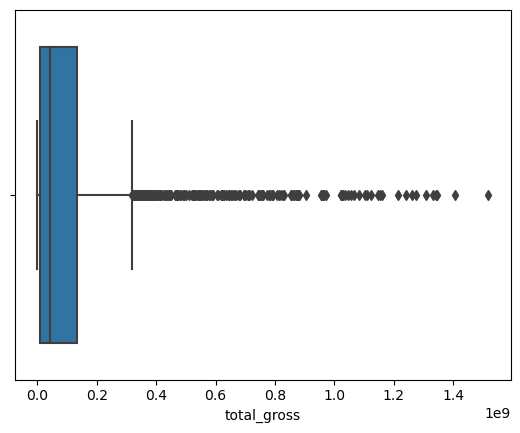

In [141]:
sns.boxplot(x='total_gross', data = movie_gross)

In [162]:
# The most produced genres 
movie_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
unknown                        5408
Horror                         4372
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1086, dtype: int64

In [167]:
# The studios that produces the most films
movie_gross['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 258, dtype: int64

In [164]:
# Calculating the sum of domestic and foreign gross earnings
movie_gross['domestic_gross'].sum()

96557293580.0

In [165]:
movie_gross['foreign_gross'].sum()

152515908583.0

# Conclusion

Some of the concluions include:
1. The three top most produced film genres were, Documentaries, Drama and comedy
2. The foreign markets had higher gross income compared to domestic


#### Recommendation

1) The company should emphasize on producing more films that are in genre categories of Documentaries, Drama and comedy

2) The company should invest more on producing films for foreign markets to maximize on earnings

3) The company could partner with studios like IFC, Uni, WB as they are among the key player in the industry